In [48]:
!pip install nltk

In [40]:
import nltk
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#### Data Cleaning

In [3]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
#drop the nan value and columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [5]:
#rename the columns name
df.rename(columns={'v1':'target', 'v2':'sentence'}, inplace=True)

In [6]:
df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [7]:
le = LabelEncoder()
df.target=le.fit_transform(df.target)

In [8]:
df.sample(6)

,target,sentence
3182,0,Dunno i juz askin cos i got a card got 20% off...
4408,1,For your chance to WIN a FREE Bluetooth Headse...
4486,0,Miss call miss call khelate kintu opponenter m...
2329,0,Am surfing online store. For offers do you wan...
3457,0,Have your lunch and come quickly and open the ...
587,0,\Pete can you please ring meive hardly gotany ...


In [9]:
df.duplicated().sum()

403

In [10]:
df.target.value_counts()

0    4825
1     747
Name: target, dtype: int64

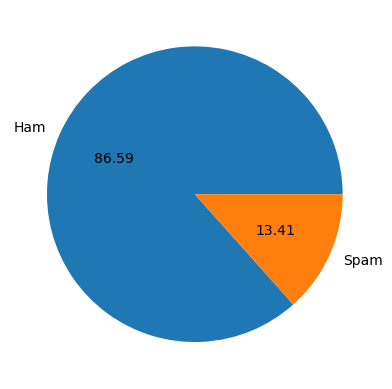

In [11]:
#Target clsss distribution
plt.pie(df.target.value_counts(), labels=['Ham','Spam'], autopct='%0.2f');

In [12]:
#find out number of charactor in the sentence.
df['no_of_char'] = df.sentence.apply(len)

In [13]:
df['no_of_words'] = df.sentence.apply(lambda x:len(nltk.word_tokenize(x)))

In [14]:
df['no_of_sentances'] = df.sentence.apply(lambda x:len(nltk.sent_tokenize(x)))


In [15]:
df

,target,sentence,no_of_char,no_of_words,no_of_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


>Graphical representation of how number of charactors, word and sentence help to find out weather the email is spam or ham.

<Axes: xlabel='no_of_char', ylabel='Count'>

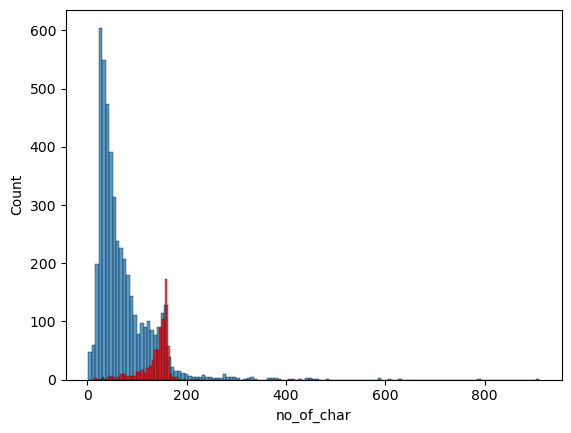

In [16]:
sns.histplot(df[df.target == 0]['no_of_char']) #ham
sns.histplot(df[df.target == 1]['no_of_char'], color='red') #Spam Message

>It is clear from the graph most of the spam messages the created by large number of charactors, words and sentence.

<Axes: xlabel='no_of_words', ylabel='Count'>

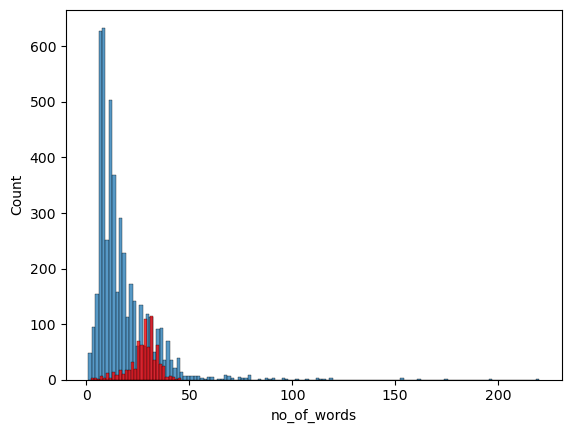

In [17]:
sns.histplot(df[df.target == 0]['no_of_words'])
sns.histplot(df[df.target == 1]['no_of_words'], color='red')

<Axes: xlabel='no_of_sentances', ylabel='Count'>

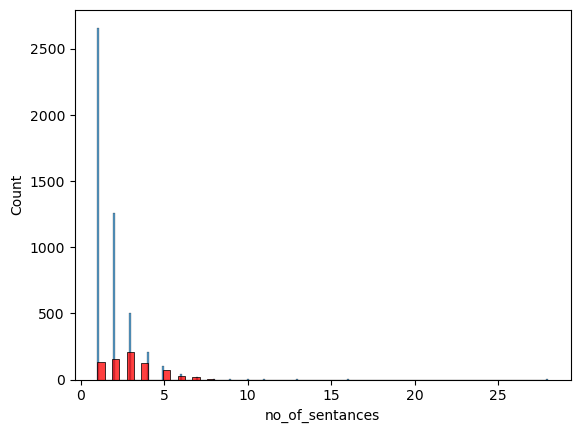

In [18]:
sns.histplot(df[df.target == 0]['no_of_sentances'])
sns.histplot(df[df.target == 1]['no_of_sentances'], color='red')

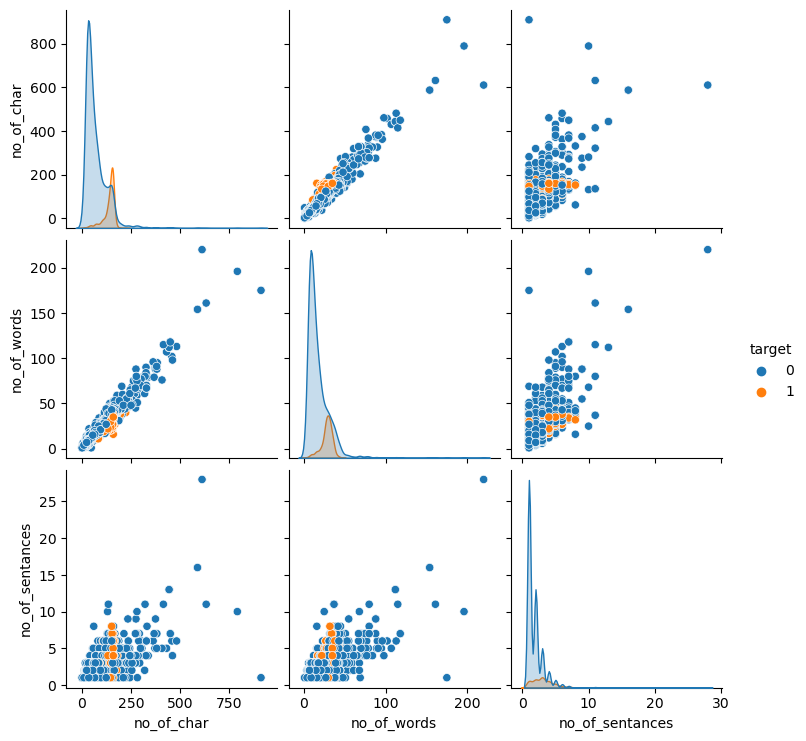

In [19]:
sns.pairplot(df, hue='target')

C:\Users\visha\AppData\Local\Temp\ipykernel_14912\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

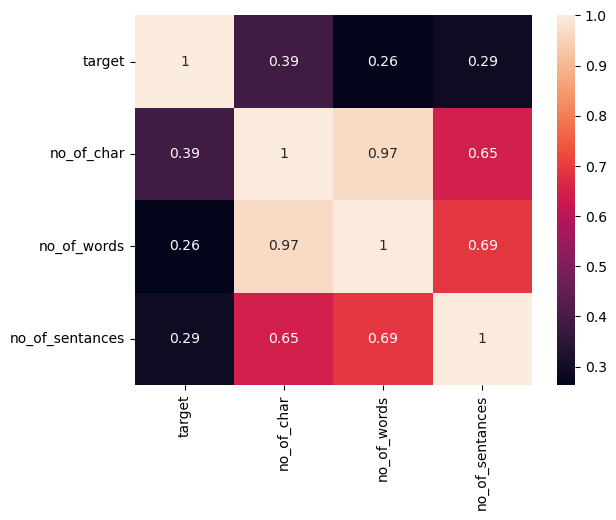

In [20]:
sns.heatmap(df.corr(), annot=True)

Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [21]:
ps = PorterStemmer()
ps.stem('caring')

'care'

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
def data_Preprocess(sentences):
    sentences = sentences.lower()
    words = nltk.word_tokenize(sentences)
    words = [word for word in words if word.isalnum()]
    words = [word for word in words if word not in stopwords.words('english') and word not in string.punctuation]
    words = [ps.stem(word) for word in words]
           
    return " ".join(words)

In [25]:
df['sentence'] = df.sentence.apply(data_Preprocess)

In [26]:
df

,target,sentence,no_of_char,no_of_words,no_of_sentances
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1
...,...,...,...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...,161,35,4
5568,0,b go esplanad fr home,37,9,1
5569,0,piti mood suggest,57,15,2
5570,0,guy bitch act like interest buy someth els nex...,125,27,1


>Creat a word cloud for the spam text

In [ ]:
#!pip install wordcloud

In [28]:
from wordcloud import WordCloud
wc = WordCloud(width=1280,height=720,min_font_size=10,background_color='white')

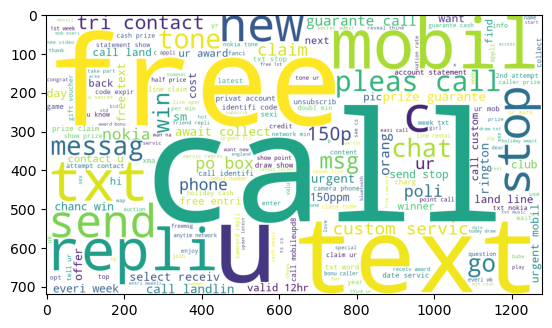

In [29]:
spam_word = wc.generate(df[df['target'] == 1]['sentence'].str.cat(sep=" "))
plt.imshow(spam_word)

In [30]:
top_spam_words = []
word_list = df[df.target == 1]['sentence'].tolist()
for words in word_list:
    for word in words.split(" "):
        top_spam_words.append(word)
top_spam_words
    

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [31]:
from collections import Counter
spam_words_count = Counter(top_spam_words).most_common(30)
spam_words_count

[('call', 365),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('u', 141),
 ('text', 139),
 ('mobil', 135),
 ('4', 120),
 ('claim', 115),
 ('stop', 114),
 ('repli', 112),
 ('prize', 94),
 ('get', 88),
 ('tone', 74),
 ('servic', 72),
 ('send', 70),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('week', 62),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('contact', 61),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51),
 ('collect', 51)]

### Building Predictore

In [112]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [113]:
X = tfidf.fit_transform(df['sentence']).toarray()

In [114]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [115]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [117]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672645739910314
[[841 116]
 [ 32 126]]
0.5206611570247934


In [118]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [119]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9766816143497757
[[955   2]
 [ 24 134]]
0.9852941176470589


In [120]:
!pip install xgboost

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [122]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [123]:
clfs = {
    'Support Vector Classifier' : svc,
    'K-Neighbors Classifier' : knc, 
    'Naive Bayes Classifier': mnb, 
    'Decision Tree Algorithm': dtc, 
    'Logistic Regression': lrc, 
    'Random Forest Classifier': rfc, 
    'AdaBoost Classifier': abc, 
    'Bagging Classifier': bc, 
    'ExtraTrees Classifier': etc,
    'Gradient Boosting Classifier':gbdt,
    'xgboost classifierr':xgb
}

In [124]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9704035874439462, 0.9844961240310077)

In [125]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print(name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Support Vector Classifier
Accuracy -  0.9704035874439462
Precision -  0.9844961240310077

K-Neighbors Classifier
Accuracy -  0.9040358744394619
Precision -  1.0

Naive Bayes Classifier
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827

Decision Tree Algorithm
Accuracy -  0.9246636771300448
Precision -  0.8775510204081632

Logistic Regression
Accuracy -  0.9515695067264573
Precision -  0.9642857142857143

Random Forest Classifier
Accuracy -  0.9659192825112107
Precision -  0.9918032786885246

AdaBoost Classifier
Accuracy -  0.9596412556053812
Precision -  0.959349593495935

Bagging Classifier
Accuracy -  0.9596412556053812
Precision -  0.9312977099236641

ExtraTrees Classifier
Accuracy -  0.967713004484305
Precision -  0.9919354838709677

Gradient Boosting Classifier
Accuracy -  0.9363228699551569
Precision -  0.9306930693069307

xgboost classifierr
Accuracy -  0.9632286995515695
Precision -  0.9834710743801653



In [126]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df.reset_index(inplace=True)
performance_df.drop(['index'], axis=1, inplace=True)

In [127]:
performance_df

,Algorithm,Accuracy,Precision
0,K-Neighbors Classifier,0.904036,1.000000
1,ExtraTrees Classifier,0.967713,0.991935
2,Random Forest Classifier,0.965919,0.991803
3,Naive Bayes Classifier,0.965022,0.991736
4,Support Vector Classifier,0.970404,0.984496
5,xgboost classifierr,0.963229,0.983471
6,Logistic Regression,0.951570,0.964286
7,AdaBoost Classifier,0.959641,0.959350
8,Bagging Classifier,0.959641,0.931298
9,Gradient Boosting Classifier,0.936323,0.930693


### Model Predictions

In [132]:
# Define the input text
# TF-IDF Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

input_mail = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

# Preprocess the input text
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(input_mail)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Make a prediction
prediction = clf.predict(X_train_tfidf)

# Interpret the prediction
if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"

# Print the result
print(f"Prediction: {result}")

Prediction : Ham


In [137]:
input_mail = ["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(input_mail).toarray()

# Preprocess the input text
input_counts = vectorizer.transform(input_mail)
input_tfidf = tfidf_transformer.transform(input_counts)

# Make a prediction
prediction = clf.predict(input_tfidf)

# Interpret the prediction
if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"
    

# Print the result
print(f"Prediction: {result}")

Prediction: Spam
